# Development Environment Setup
![](./repo_terminal.png)
![](./venv.png)

# Simulation of Multivariate Normal Distribution

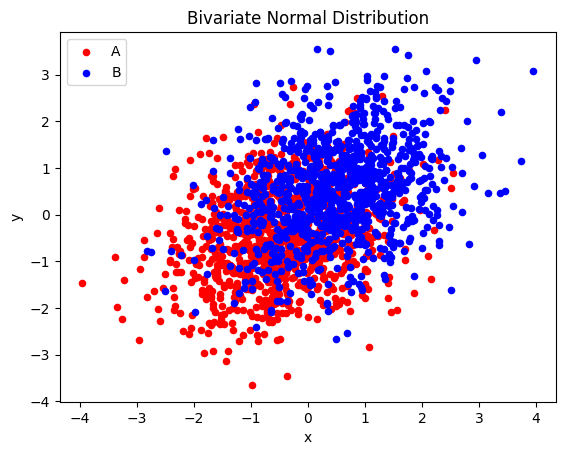

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

m = 1000

meanA = [-0.5, -0.5]
covA = [[1, 0.25],
        [0.25, 1]]

meanB = [0.5, 0.5]
covB = [[1, 0.25],
        [0.25, 1]]

samplesA = np.random.multivariate_normal(meanA, covA, m)
samplesB = np.random.multivariate_normal(meanB, covB, m)

dfA = pd.DataFrame(samplesA, columns=['x', 'y'])
dfB = pd.DataFrame(samplesB, columns=['x', 'y'])

ax = dfA.plot(x='x', y='y', kind='scatter', color='red')
dfB.plot(ax=ax, x='x', y='y', kind='scatter', color='blue', title="Bivariate Normal Distribution")
plt.legend(['A', 'B'])

# K-Means Clustering

In [2]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = dfC.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [3]:
dfC = pd.concat([dfA, dfB])

centroids = random_centroids(dfC, 5)

/tmp/ipykernel_15882/1398835617.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = dfC.apply(lambda x: float(x.sample()))


In [4]:
centroids

,0,1,2,3,4
x,-0.257796,0.627006,0.858737,0.036865,0.586488
y,-0.332559,1.033863,-0.876429,0.671932,0.395545


In [5]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [6]:
labels = get_labels(dfC, centroids)
labels.value_counts()

0    792
1    397
3    315
4    257
2    239
Name: count, dtype: int64

In [7]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [9]:
dfC = dfC.reset_index()

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

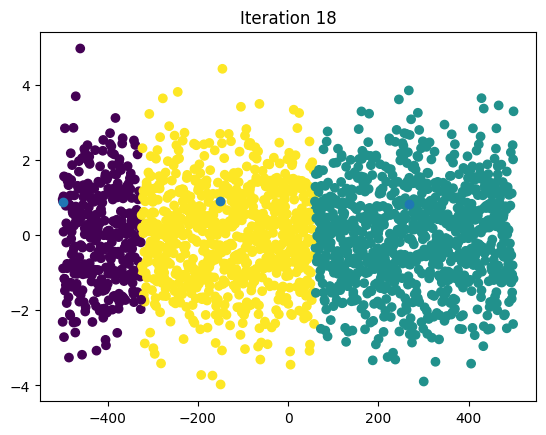

In [10]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(dfC, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(dfC, centroids)
    centroids = new_centroids(dfC, labels, centroid_count)
    plot_clusters(dfC, labels, centroids, iteration)
    iteration += 1

In [11]:
centroids

,0,1,2
index,0.000000,768.410376,348.592511
x,0.603439,0.571868,0.630060
y,0.607446,0.657361,0.656555


In [12]:
labels.value_counts()

1    882
2    768
0    350
Name: count, dtype: int64

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(3)
kmeans.fit(dfC)

KMeans(n_clusters=3)

In [15]:
pd.DataFrame(kmeans.cluster_centers_).T

,0,1,2
0,831.000000,164.500000,496.000000
1,0.003418,-0.008275,-0.029311
2,0.085528,0.005474,0.008884


# Projection with Principal Components Analysis (PCA)

In [16]:
# get data
data = pd.concat([dfA, dfB])

# each feature will have zero mean
data = data - np.mean(data, axis=0)

# initialize
pca = PCA(n_components=2)

# fit
pca.fit(data)

PCA(n_components=2)

In [17]:
#get principal components
principal_comps_builtin = pca.components_.T

#print each principal component
for i,component in enumerate(pca.components_):
    print(f'principal component {i}')
    print(component)
    print()

principal component 0
[0.67124473 0.7412358 ]

principal component 1
[ 0.7412358  -0.67124473]

